# loan default case study 

In [179]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [180]:
pwd

'C:\\Users\\pradeep reddy\\desktop'

In [156]:
cd C:\\Users\\pradeep reddy\desktop

C:\Users\pradeep reddy\desktop


In [181]:
#importing data
loan=pd.read_csv("loan.csv")

In [182]:
#data understanding
loan.shape

(39717, 111)

In [183]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [184]:
#finding sum of missing values in each column
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [163]:
#data cleaning 
#here in the data set we are having most of the columns are havining null values so we are  Dropping all columns with only null values
loan=loan.dropna(axis=1,how='all')
loan.shape

(39717, 57)

In [186]:
#data cleaning
#finding the percentage of null values in the data set
round(loan.isnull().sum()/len(loan)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [187]:
#data cleaning
#removing columns that are having more than 50% null values
loan=loan.loc[:,round(loan.isnull().sum()/len(loan)*100,2)<50]
loan.shape

(39717, 54)

In [188]:
#data cleaning 
#here in the data set we can observe some columns having only one unique values we dont need that so we remove columns with only one unique values
loan= loan.loc[:,loan.nunique()!=1]
loan.shape

(39717, 45)

In [190]:
#data cleaning
#removing unnecessary columns 
#removing unnecessary columns
drop_columns=['id','member_id','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','open_acc','desc','title','last_credit_pull_d','last_pymnt_d']
loan=loan.drop(drop_columns,axis=1)
loan.dtypes

drop_columns1=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
loan=loan.drop(drop_columns1,axis=1)

In [191]:
loan.shape

(39717, 28)

In [192]:
# removing special charchters and Converting  and int_rate into a numeric type
loan.int_rate=loan.int_rate.str.rstrip('%').astype('object')


In [193]:
loan['int_rate']=loan['int_rate'].astype(str).astype(float)
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [194]:
# Creating a profit and loss column
loan['Pnl']=round((loan['total_pymnt']-loan['funded_amnt'])*100/loan['funded_amnt'],2)

In [195]:
# Creating a column whihc is ratio of funded amount and annual income
loan['loan_inc_ratio']=round(loan.funded_amnt*100/loan.annual_inc,0)

In [196]:
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#we can observe that most of them are fully paid loans and reaming are charged off and current loans are not yet decided so we do not need current

In [197]:

# filtering only fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

UNIVARIATE ANYLYSIS

In [199]:
#overall default rate
round(np.mean(loan['loan_status']),3)

0.146

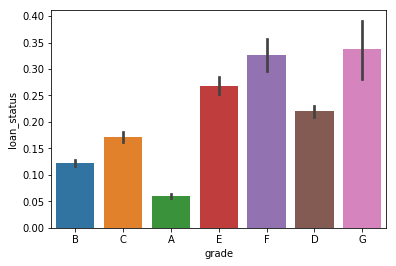

In [200]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

here we can observe that the default rates increases as the grade moves on from A to G

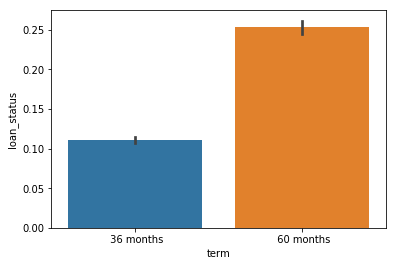

In [201]:
# here we can observe the term 60 months loans default more than 36 months loans
plot_cat('term')

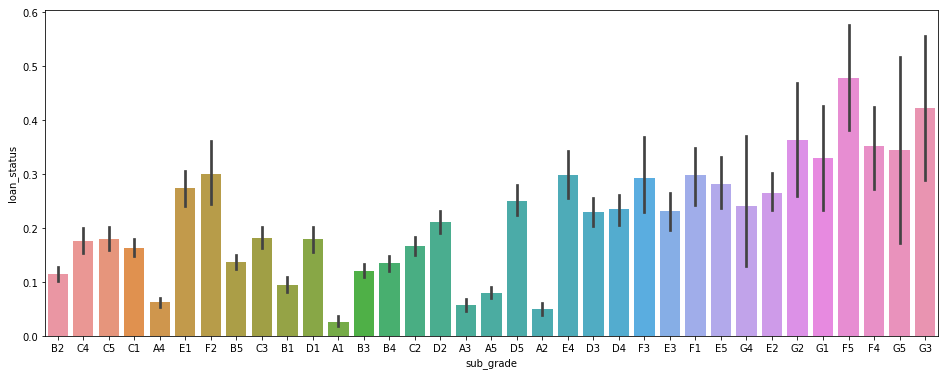

In [32]:
# here we can observe that sub-grade  A1 is better than A2 better than A3 and so on  that as grade decreases the default rate increases
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

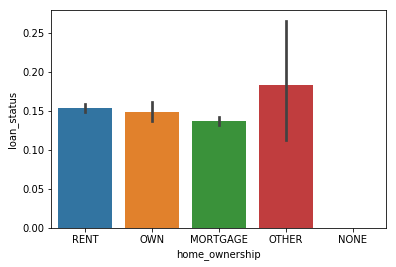

In [33]:
# home ownership we can observe only a slight difference in home ownership default rate 
plot_cat('home_ownership')

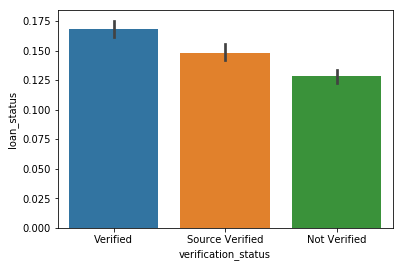

In [34]:
# verification_status here  surprisingly, verified loans default more than not verified
plot_cat('verification_status')

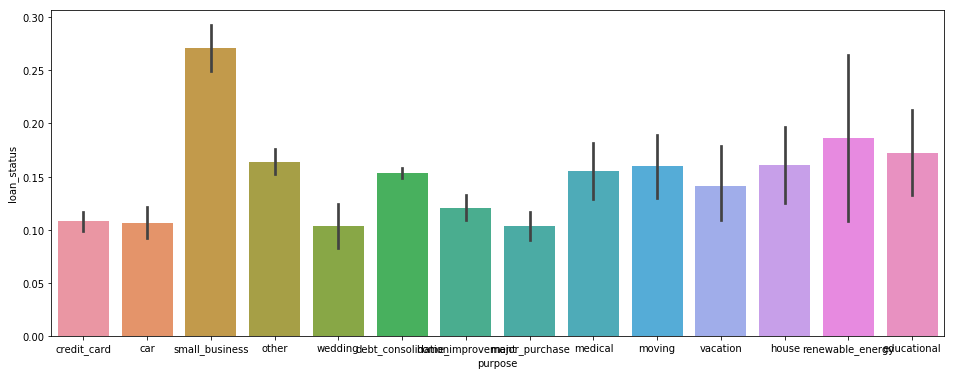

In [35]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In [36]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [41]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [42]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [43]:
#  the number of loans granted across years here can observe the number of loans increases every year
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [44]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

C:\Users\pradeep reddy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


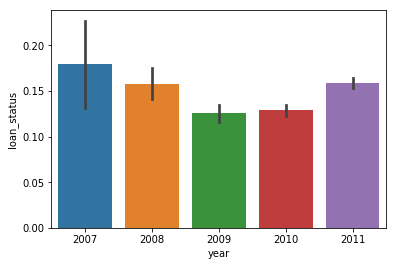

In [45]:
# loan default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('year')

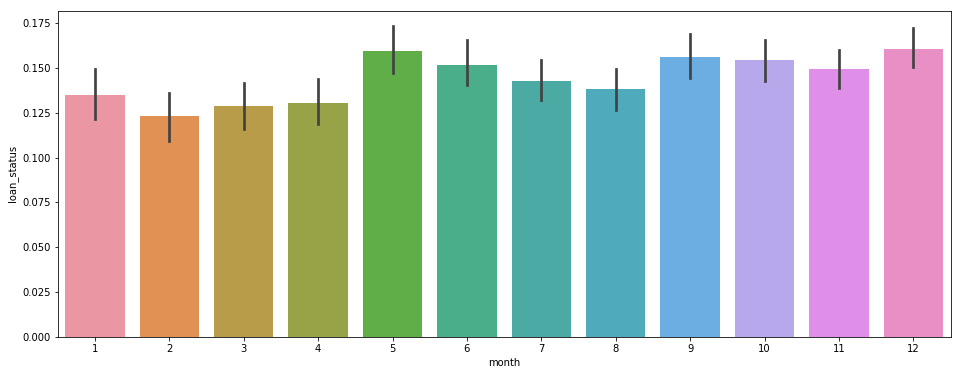

In [46]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plot_cat('month')

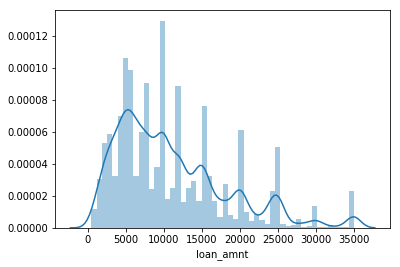

In [123]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan['loan_amnt'])
plt.show()

to analyse the default rates across continuous varaible is to bin them into descrete values

In [47]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

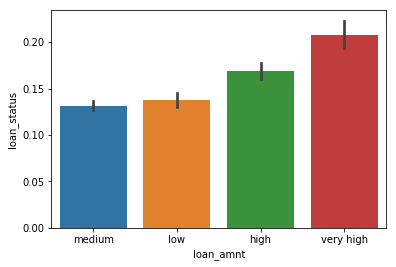

In [48]:
# the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [49]:
# let's also convert funded amount invested to bins
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

In [50]:
loan['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

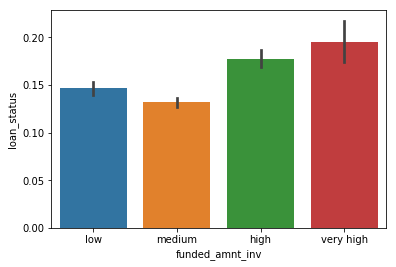

In [51]:
# funded amount invested
plot_cat('funded_amnt_inv')

In [52]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

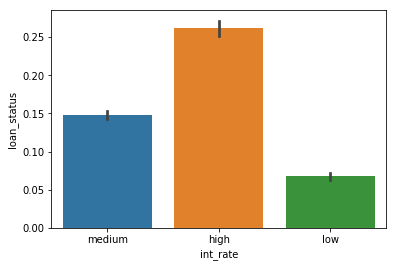

In [53]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_cat('int_rate')

In [54]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

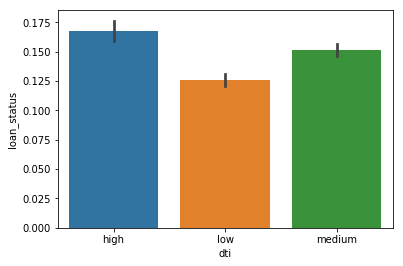

In [55]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

In [56]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda x: funded_amount(x))

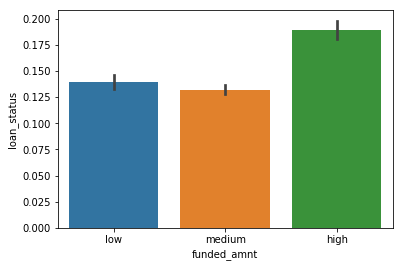

In [57]:

plot_cat('funded_amnt')

In [58]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

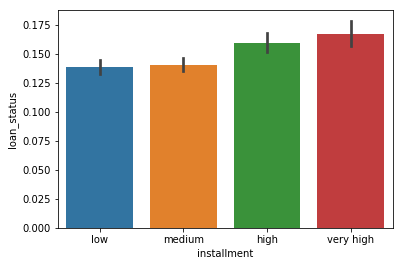

In [59]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

In [60]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

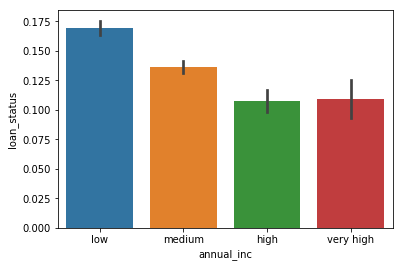

In [61]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat('annual_inc')

# Segmented Univariate Analysis

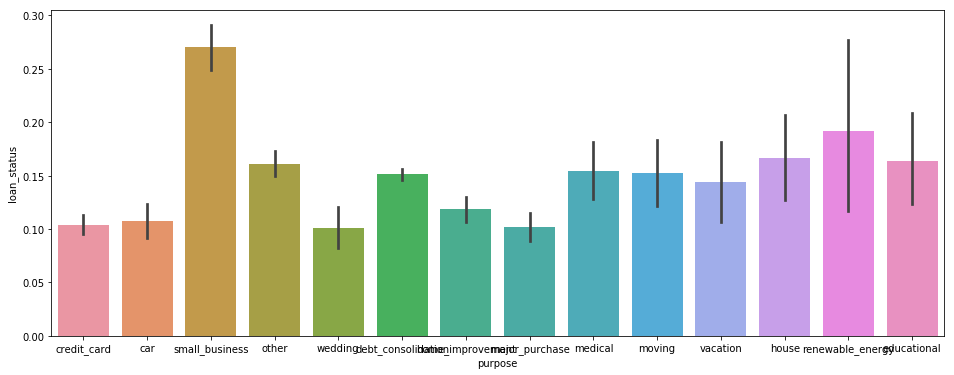

In [64]:
# purpose: small business loans defualt the most, then renewable energy and education
#we can observe that purpose of the loan can affect the default rate so we could possibly decrease the default by decreasing the loans 
plt.figure(figsize=(16, 6))
plot_cat('purpose')

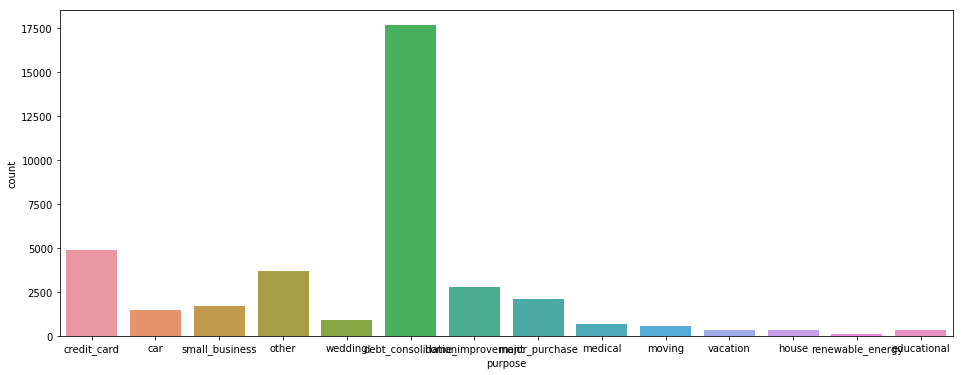

In [65]:
# lets  look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=loan)
plt.show()

In [66]:
# filtering the data frame  for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

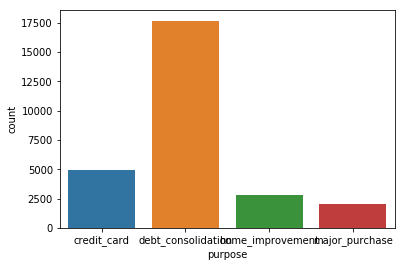

In [67]:
# plotting number of loans by purpose 
sns.countplot(x=loan['purpose'])
plt.show()

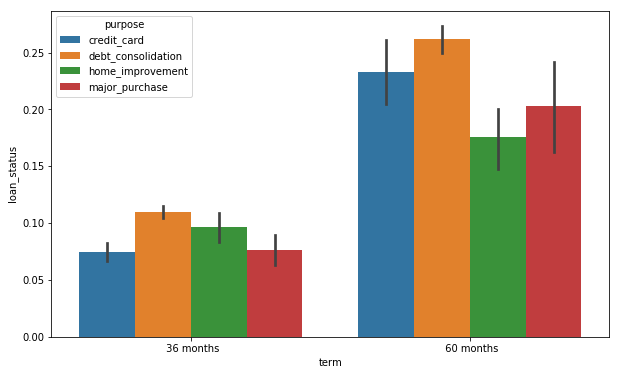

In [68]:
#  comparing the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

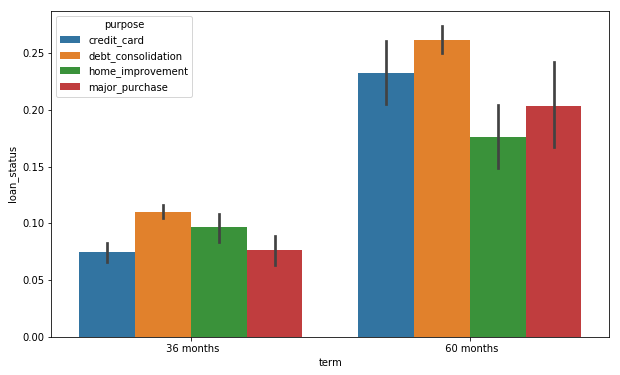

In [69]:
#  function for which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan)
    plt.show()

    
plot_segmented('term')

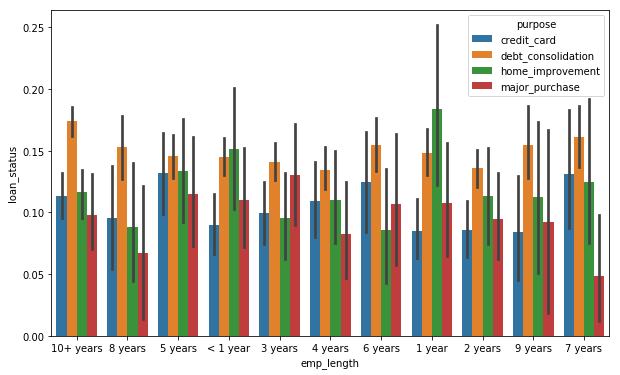

In [70]:
# emp_length
plot_segmented('emp_length')

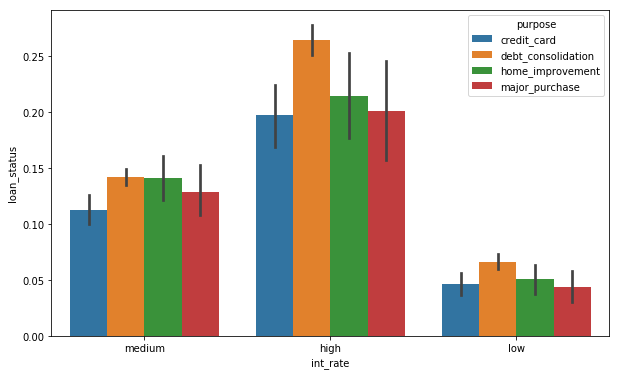

In [71]:
# interest rate
plot_segmented('int_rate')

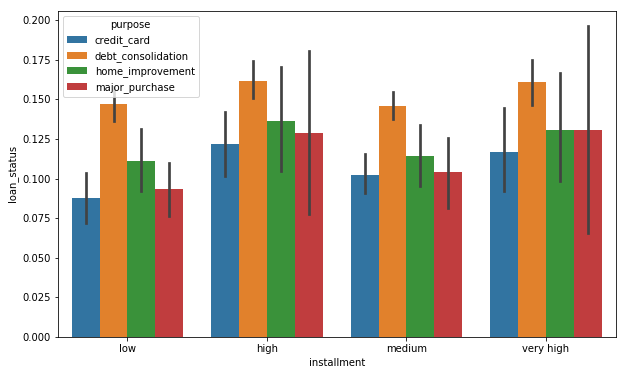

In [72]:
# installment
plot_segmented('installment')

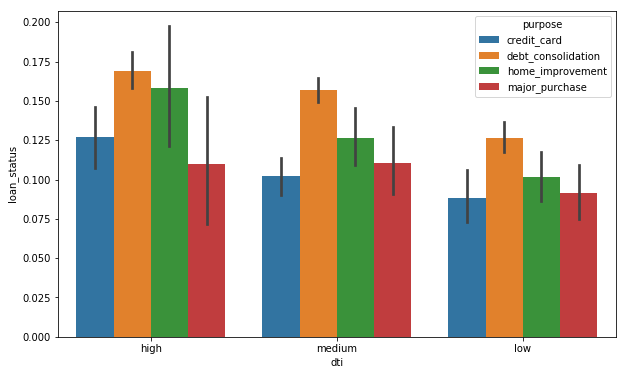

In [152]:
# debt to income ratio
plot_segmented('dti')

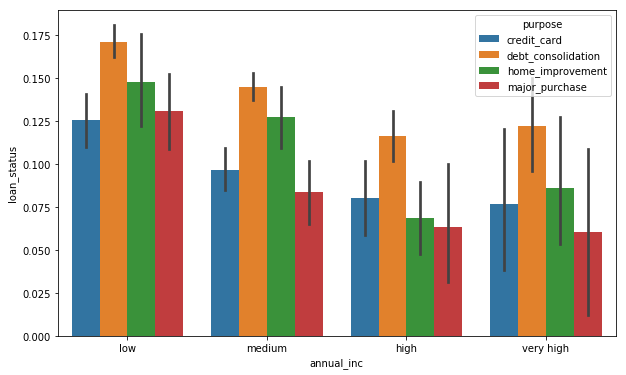

In [153]:
# annual income
plot_segmented('annual_inc')

In [73]:
# variation of default rate across annual_inc
loan.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

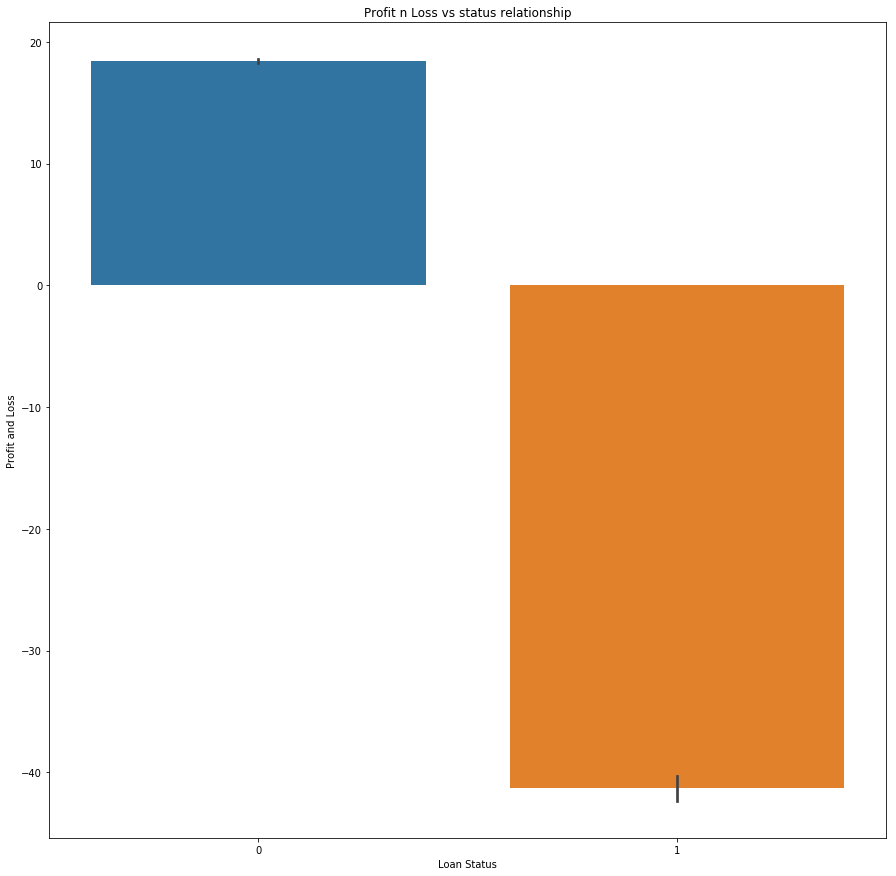

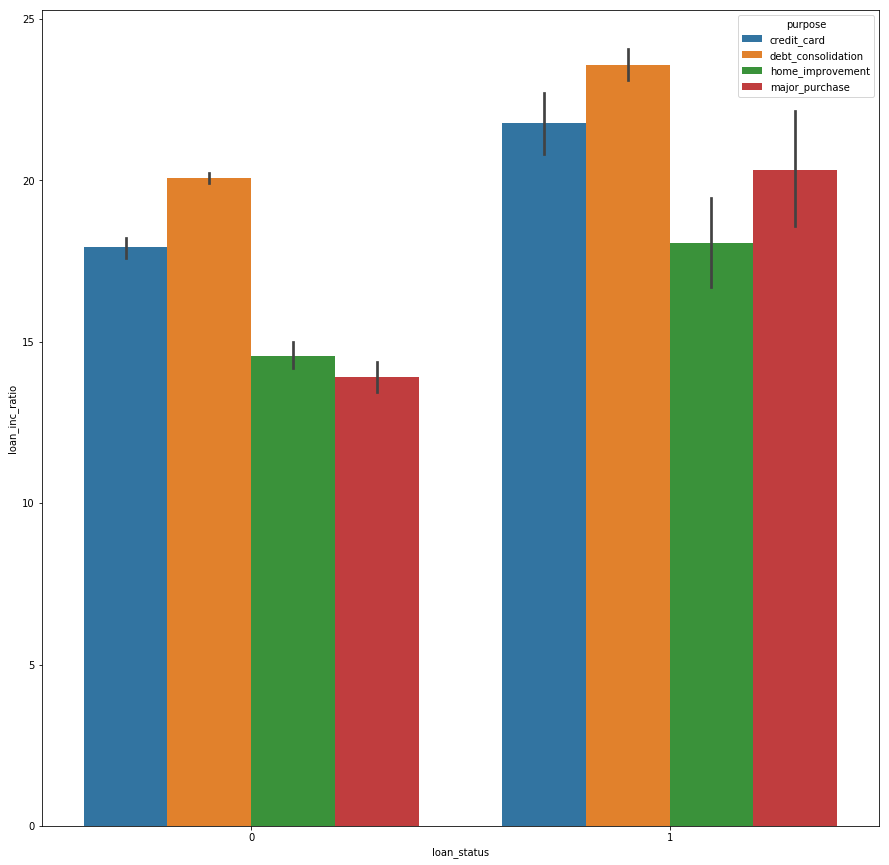

In [76]:
# Relationship of default with funded amount 
plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='Pnl',data=loan)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()


plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan)

plt.show()

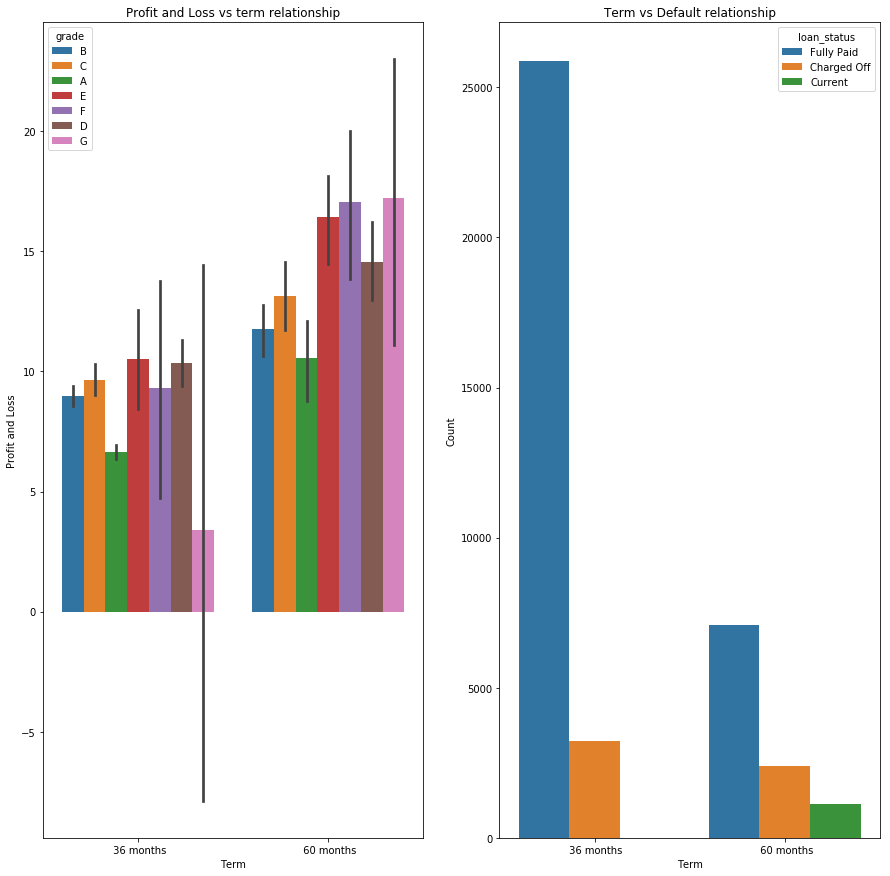

In [49]:
# Relationship of default with term with a barplot
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='Pnl',data=loan,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")


plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loan)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()

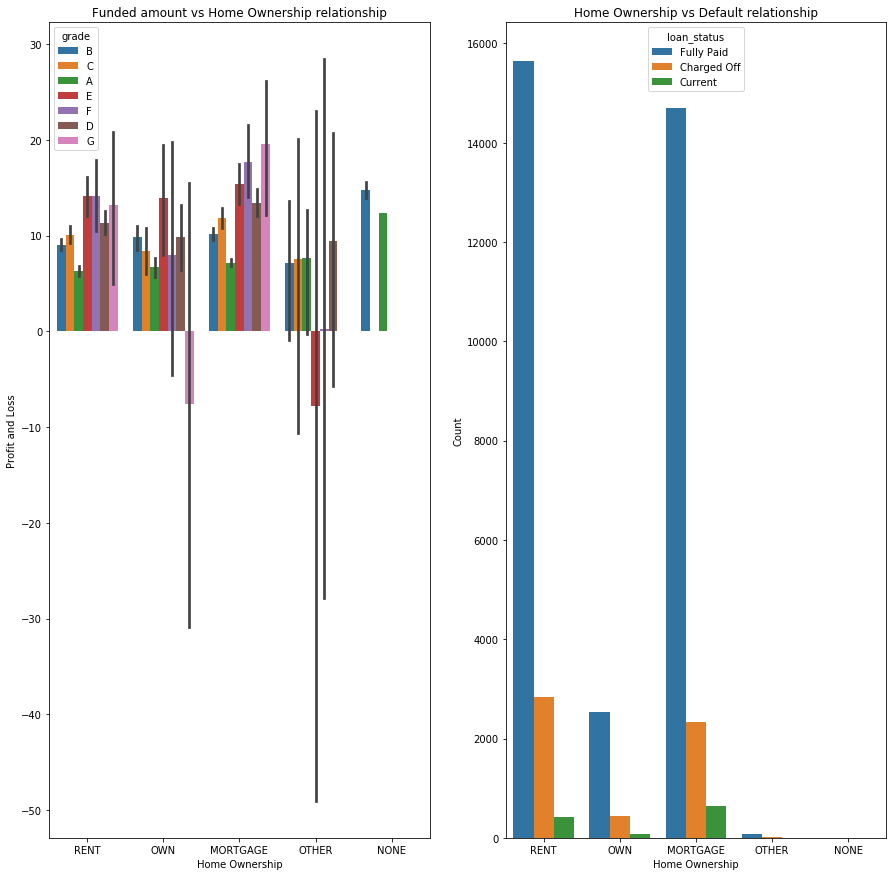

In [50]:
#funded amount vs home ownership and home ownership vs default relationship 
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='Pnl',data=loan,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")

plt.title("Funded amount vs Home Ownership relationship")


plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=loan)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()

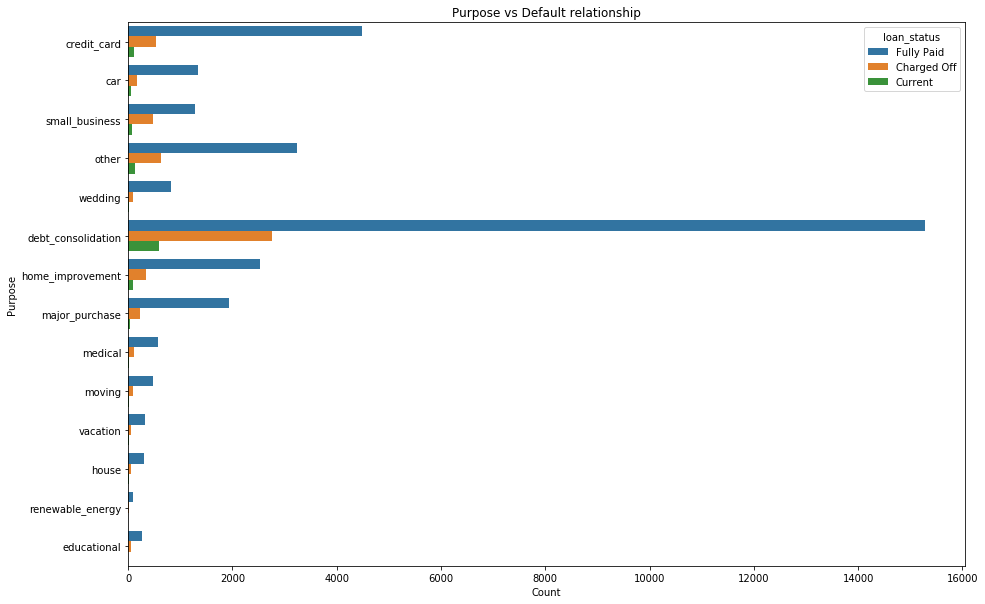

In [55]:
#purpose vs default releation ship
plt.figure(figsize=(15,10))
sns.countplot(y='purpose',hue='loan_status',data=loan)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

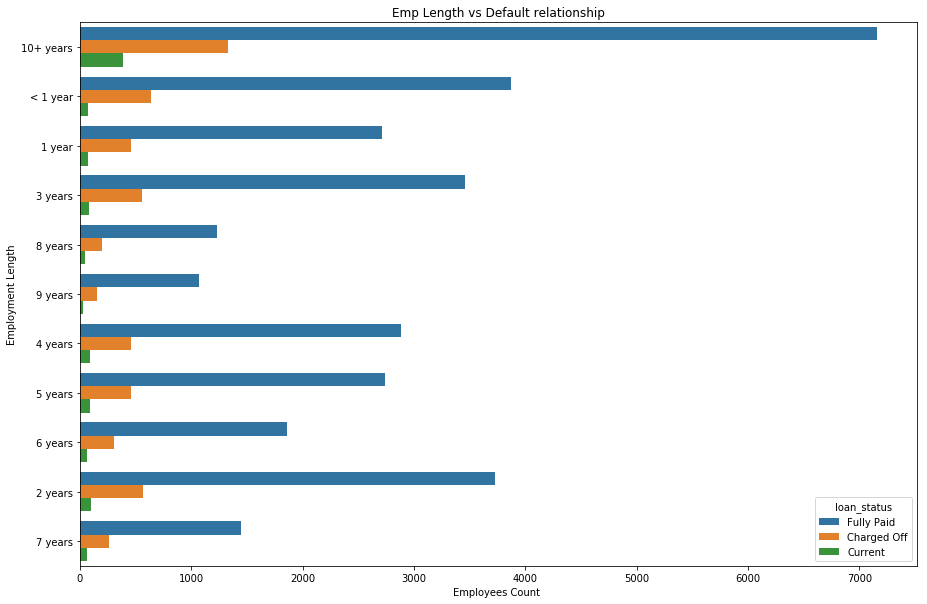

In [58]:
#employee vs default 
plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',hue='loan_status',data=loan)
plt.xlabel("Employees Count ")
plt.ylabel("Employment Length")
plt.title("Emp Length vs Default relationship")
plt.show()